In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import minisom

In [16]:
with open('Learning_data1.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7
0,6.0,2.0,4.0,4.0,7.0,4.0,6.0,6.0
1,10.0,10.0,9.0,9.0,9.0,9.0,10.0,9.0
2,7.0,6.0,7.0,4.0,5.0,4.0,7.0,7.0
3,7.0,5.0,6.0,6.0,7.0,6.0,8.0,7.0
4,8.0,6.0,7.0,5.0,6.0,5.0,8.0,7.0
...,...,...,...,...,...,...,...,...
95,8.0,6.0,7.0,7.0,8.0,7.0,8.0,8.0
96,6.0,3.0,4.0,4.0,6.0,4.0,7.0,6.0
97,9.0,9.0,9.0,8.0,9.0,9.0,10.0,9.0
98,6.0,4.0,6.0,3.0,5.0,4.0,7.0,6.0


In [17]:
with open('PCA_data1.txt', 'r') as f:
    data = np.loadtxt(f)

df_PCA = pd.DataFrame(data)
df_PCA

,0,1
0,-3.800491,-1.248947
1,3.747898,0.153340
2,-2.054701,1.269307
3,-1.060259,-0.437373
4,-0.969380,0.730607
...,...,...
95,0.413861,-0.444029
96,-3.542253,-0.679270
97,3.140635,0.081243
98,-3.329110,0.625090


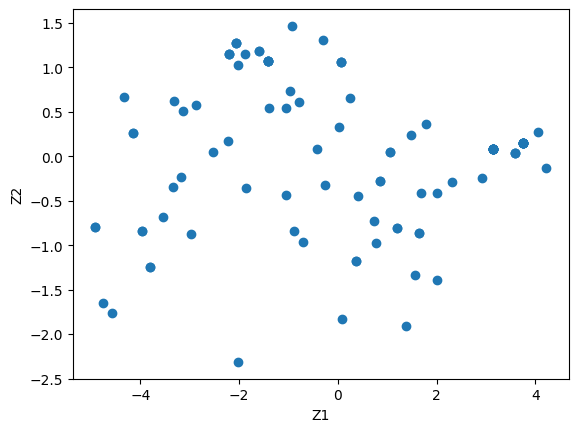

In [18]:
plt.scatter(df_PCA[0], df_PCA[1])
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.show()

In [19]:
som = minisom.MiniSom(2, 2, df.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df.values)
som.train_random(df.values, 100)
feature_map = som.win_map(df.values)
# feature_map

In [20]:
clusters = {}
cluster_means = {}

for neuron_weights, mapped_data in feature_map.items():
    mapped_data = np.array(mapped_data)
    mean_values = np.mean(mapped_data, axis = 0)
    clusters[neuron_weights] = mapped_data
    cluster_means[neuron_weights] = mean_values

for neuron_weights, mean_values in cluster_means.items():
    print(f"Cluster {neuron_weights}:")
    for i, mean_value in enumerate(mean_values):
        print(f"Feature {i + 1}: {mean_value}")
    print()

Cluster (1, 0):
Feature 1: 6.0
Feature 2: 2.9047619047619047
Feature 3: 4.666666666666667
Feature 4: 3.761904761904762
Feature 5: 6.0476190476190474
Feature 6: 4.0
Feature 7: 6.476190476190476
Feature 8: 5.857142857142857

Cluster (1, 1):
Feature 1: 9.538461538461538
Feature 2: 9.384615384615385
Feature 3: 8.923076923076923
Feature 4: 8.538461538461538
Feature 5: 9.038461538461538
Feature 6: 8.961538461538462
Feature 7: 9.961538461538462
Feature 8: 9.076923076923077

Cluster (0, 0):
Feature 1: 7.296296296296297
Feature 2: 5.851851851851852
Feature 3: 7.111111111111111
Feature 4: 4.814814814814815
Feature 5: 5.518518518518518
Feature 6: 5.037037037037037
Feature 7: 7.666666666666667
Feature 8: 7.148148148148148

Cluster (0, 1):
Feature 1: 8.192307692307692
Feature 2: 6.653846153846154
Feature 3: 7.038461538461538
Feature 4: 7.038461538461538
Feature 5: 8.615384615384615
Feature 6: 7.3076923076923075
Feature 7: 8.576923076923077
Feature 8: 7.884615384615385



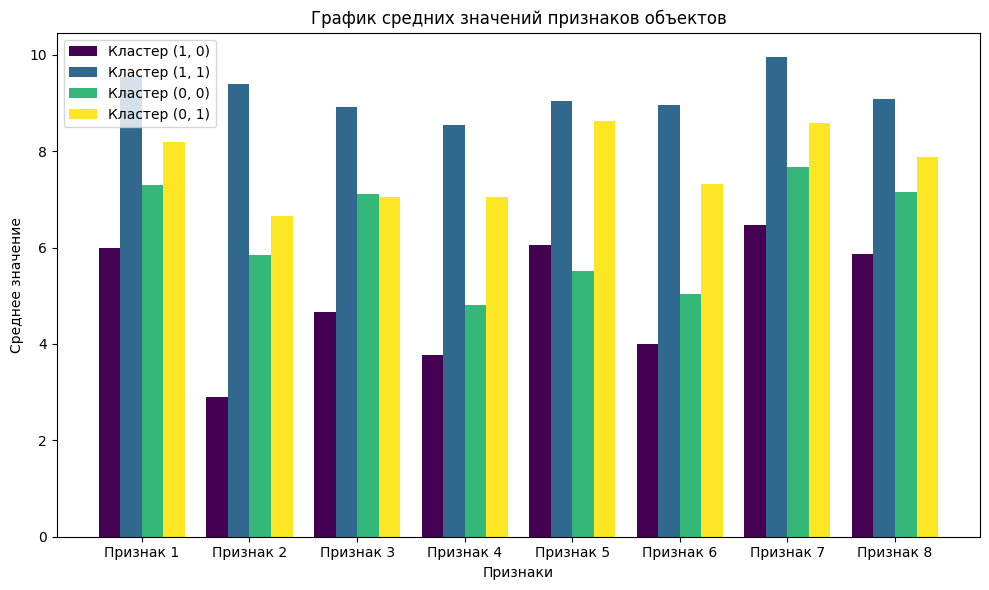

In [21]:
num_clusters = len(cluster_means)
num_features = len(list(cluster_means.values())[0])

cluster_indices = range(num_clusters)
feature_indices = range(num_features)
bar_width = 0.2

colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

plt.figure(figsize = (10, 6))

for i, (neuron_weights, mean_values) in enumerate(cluster_means.items()):
    plt.bar([x + i * bar_width for x in feature_indices], mean_values, 
            width = bar_width, label = f'Кластер {neuron_weights}', color = colors[i])

plt.xlabel('Признаки')
plt.ylabel('Среднее значение')
plt.title('График средних значений признаков объектов')
plt.xticks([x + (num_clusters - 1) * bar_width / 2 for x in feature_indices], [f"Признак {i + 1}" for i in feature_indices])
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
labels = []

for cluster in df.values:
    labels.append(som.winner(cluster))
    
df_PCA['Lablel0'] = [i[0] for i in labels]
df_PCA['Lablel1'] = [i[1] for i in labels]
df_PCA['Lablel'] = df_PCA['Lablel0'] + 2 * df_PCA['Lablel1']
df_PCA = df_PCA.drop(['Lablel0', 'Lablel1'], axis = 1)
#df_PCA.head()

In [23]:
df_PCA.groupby('Lablel').mean()

,0,1
Lablel,,
0,-1.315982,0.918135
1,-3.642278,-0.501974
2,0.868100,-0.620857
3,3.440337,0.072850


C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

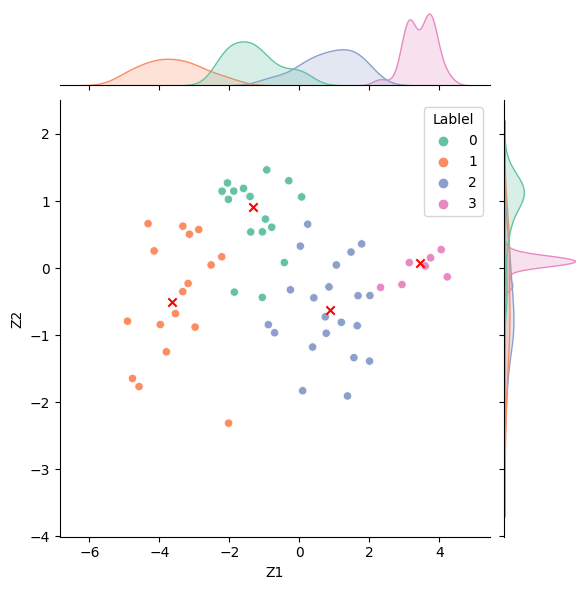

In [24]:
cluster_centers = df_PCA.groupby('Lablel').mean()
sns.jointplot(x = df_PCA[0], y = df_PCA[1], kind = "scatter", hue = df_PCA['Lablel'], palette = "Set2", height = 6)
plt.scatter(cluster_centers[0], cluster_centers[1], marker = 'x', c = 'red')
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.show()